In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss
import xarray as xr
import math 
import pandas as pd
import matplotlib.cm as cm
from matplotlib import *
import scipy as sc
from scipy.stats import t,norm
from scipy import stats,signal
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal

In [2]:
%store -r ccor_south_india
%store -r ccor_central_india
%store -r ccor_north_india
%store -r ccor_south_india_pc2
%store -r ccor_central_india_pc2
%store -r ccor_north_india_pc2
%store -r rain_north_india
%store -r rain_central_india
%store -r rain_south_india

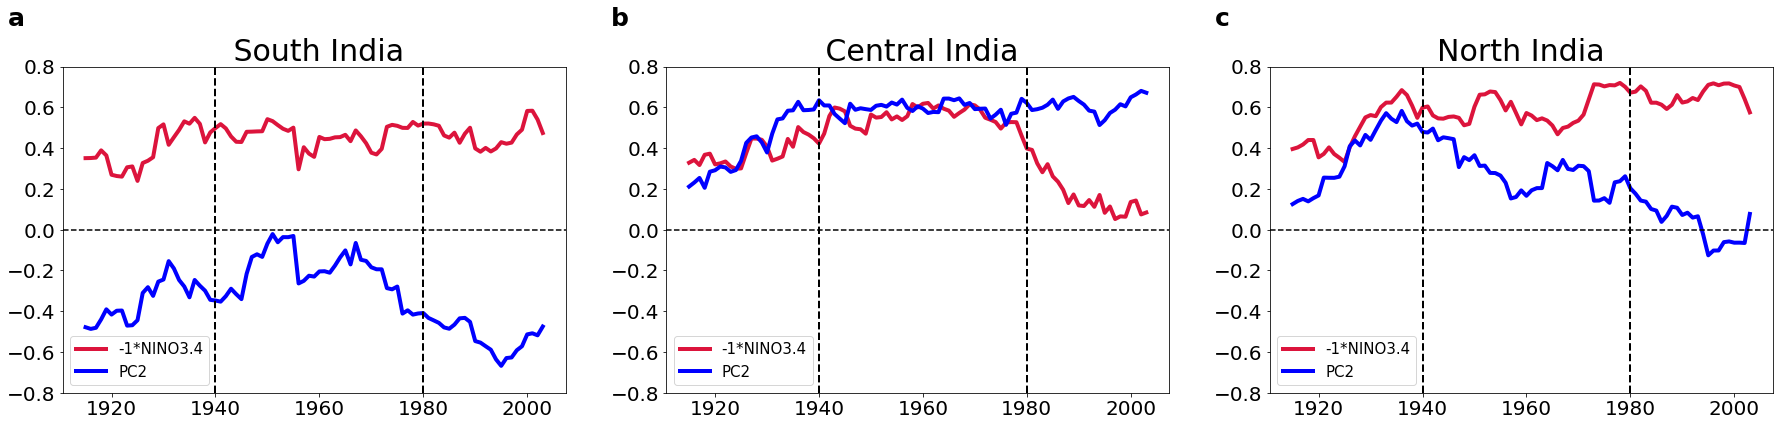

In [14]:
fig, axiom = plt.subplots(1,3, figsize=(10,6))

axiom[0].plot(np.arange(1915,2004,1),-1*ccor_south_india,'crimson',linewidth=4,label='-1*NINO3.4')
axiom[1].plot(np.arange(1915,2004,1),-1*ccor_central_india,'crimson',linewidth=4,label='-1*NINO3.4')
axiom[2].plot(np.arange(1915,2004,1),-1*ccor_north_india,'crimson',linewidth=4,label='-1*NINO3.4')

axiom[0].plot(np.arange(1915,2004,1),ccor_south_india_pc2,'blue', linewidth=4, label='PC2')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india_pc2,'blue',linewidth=4,label='PC2')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india_pc2,'blue',linewidth=4,label='PC2')


axiom[0].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[0].axvline(x=1980, color='k',linestyle='--',linewidth=2)
axiom[1].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[1].axvline(x=1980, color='k',linestyle='--',linewidth=2)
axiom[2].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[2].axvline(x=1980, color='k',linestyle='--',linewidth=2)

axiom[0].legend(fontsize=15);axiom[1].legend(fontsize=15);axiom[2].legend(fontsize=15)
axiom[0].set_title(r' South India', fontsize=30)
axiom[0].tick_params(axis="y", labelsize=20)
axiom[0].tick_params(axis="x", labelsize=20)
axiom[1].set_title(r' Central India', fontsize=30)
axiom[1].tick_params(axis="y", labelsize=20)
axiom[1].tick_params(axis="x", labelsize=20)
axiom[2].set_title(r'North India', fontsize=30)
axiom[2].tick_params(axis="y", labelsize=20)
axiom[2].tick_params(axis="x", labelsize=20)
axiom[0].set_ylim([-0.8,0.8])
axiom[1].set_ylim([-0.8,0.8])
axiom[2].set_ylim([-0.8,0.8])
axiom[0].axhline(0,linestyle='--',color='k')
axiom[1].axhline(0,linestyle='--',color='k')
axiom[2].axhline(0,linestyle='--',color='k')

axiom[0].text(1900,1.0,'a', fontsize=25, weight="bold")
axiom[1].text(1900,1.0,'b', fontsize=25, weight="bold")
axiom[2].text(1900,1.0,'c', fontsize=25, weight="bold")

fig.subplots_adjust(right=2.5)
plt.subplots_adjust(hspace=1)
plt.savefig("/home/cccr/roxy/athira/enso_paper/figure3.png", transparent = True, bbox_inches='tight', dpi=300)


In [55]:
%store -r dpfreq_df
%store -r vor_anom_850

## MT/MD 

## SST

In [5]:
data1  = "/home/cccr/roxy/athira/HadISST_sst_jjas_anom.yearly.nc"
ds1     = xr.open_dataset(data1)
r      = ds1.sst.sel(time=slice('1901-06-16','2018-09-16'), lat=slice(5,25), lon=slice(50,130)).mean(dim=['lat','lon'])


In [6]:



ccor_north_india_dpf = np.zeros(89)
for k in range(0, 89):
    temrain  =  signal.detrend(rain_north_india[:-2][k:k+30])
    temsst   =   signal.detrend(dpfreq_df['dpfreq'][k:k+30])
    ccor_north_india_dpf[k] = np.corrcoef(temrain,temsst)[0,1]



ccor_central_india_dpf = np.zeros(89)
for k in range(0, 89):
    temrain = signal.detrend(rain_central_india[:-2][k:k+30])
    temsst   =   signal.detrend(dpfreq_df['dpfreq'][k:k+30])
    ccor_central_india_dpf[k] = np.corrcoef(temrain,temsst)[0,1]

ccor_south_india_dpf = np.zeros(89)
for k in range(0, 89):
    temprain=signal.detrend(rain_south_india[:-2][k:k+30])
    tempsst   =   signal.detrend(dpfreq_df['dpfreq'][k:k+30])
    ccor_south_india_dpf[k] = np.corrcoef(temprain,tempsst)[0,1]
    
#######vor_850



ccor_north_india_vor = np.zeros(89)
for k in range(0, 89):
    temrain  =  signal.detrend(rain_north_india[:-3][k:k+30])
    temsst   =   signal.detrend(vor_anom_850['VOR'][k:k+30])
    ccor_north_india_vor[k] = np.corrcoef(temrain,temsst)[0,1]



ccor_central_india_vor = np.zeros(89)
for k in range(0, 89):
    temrain = signal.detrend(rain_central_india[:-3][k:k+30])
    tempsst   =   signal.detrend(vor_anom_850['VOR'][k:k+30])
    ccor_central_india_vor[k] = np.corrcoef(temrain,tempsst)[0,1]

ccor_south_india_vor = np.zeros(89)
for k in range(0, 89):
    temprain=signal.detrend(rain_south_india[:-3][k:k+30])
    tempsst   =   signal.detrend(vor_anom_850['VOR'][k:k+30])
    ccor_south_india_vor[k] = np.corrcoef(temprain,tempsst)[0,1]
    
####SST
ccor_north_india_sst = np.zeros(89)
for k in range(0, 89):
    temrain  =  signal.detrend(rain_north_india[k:k+30])
    temsst   =   signal.detrend(r[k:k+30])
    ccor_north_india_sst[k] = np.corrcoef(temrain,temsst)[0,1]



ccor_central_india_sst = np.zeros(89)
for k in range(0, 89):
    temrain = signal.detrend(rain_central_india[k:k+30])
    tempsst   =   signal.detrend(r[k:k+30])
    ccor_central_india_sst[k] = np.corrcoef(temrain,tempsst)[0,1]

ccor_south_india_sst= np.zeros(89)
for k in range(0, 89):
    temprain=signal.detrend(rain_south_india[k:k+30])
    tempsst   =   signal.detrend(r[k:k+30])
    ccor_south_india_sst[k] = np.corrcoef(temprain,tempsst)[0,1]

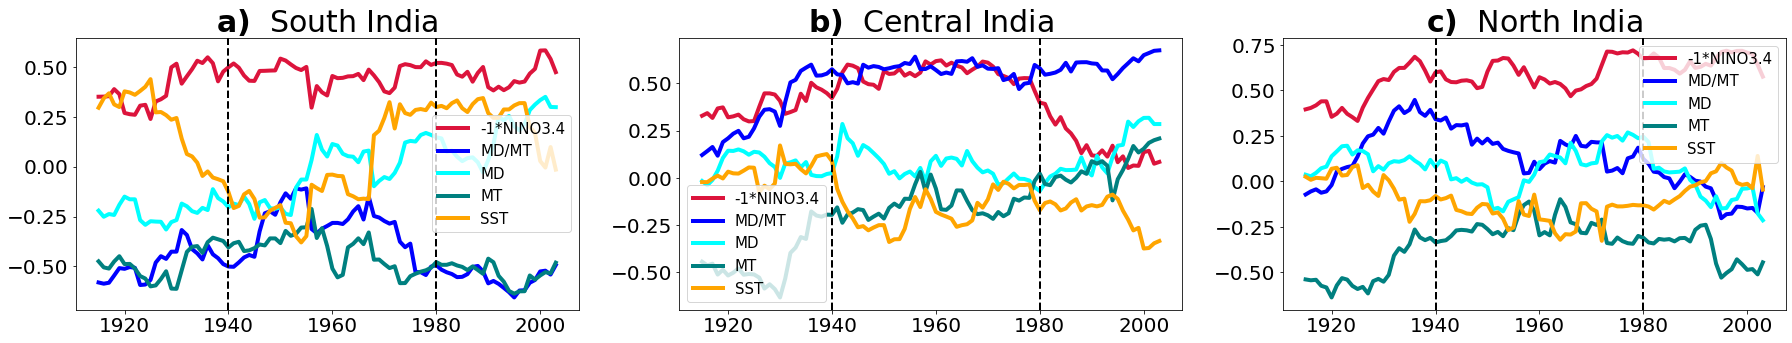

In [7]:
fig, axiom = plt.subplots(1,3, figsize=(10,5))

axiom[0].plot(np.arange(1915,2004,1),-1*ccor_south_india,'crimson',linewidth=4,label='-1*NINO3.4')
axiom[1].plot(np.arange(1915,2004,1),-1*ccor_central_india,'crimson',linewidth=4,label='-1*NINO3.4')
axiom[2].plot(np.arange(1915,2004,1),-1*ccor_north_india,'crimson',linewidth=4,label='-1*NINO3.4')

axiom[0].plot(np.arange(1915,2004,1),ccor_south_india_pc2,'blue', linewidth=4, label='MD/MT')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india_pc2,'blue',linewidth=4,label='MD/MT')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india_pc2,'blue',linewidth=4,label='MD/MT')

axiom[0].plot(np.arange(1915,2004,1),ccor_south_india_dpf,'cyan', linewidth=4, label='MD')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india_dpf,'cyan',linewidth=4,label='MD')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india_dpf,'cyan',linewidth=4,label='MD')

axiom[0].plot(np.arange(1915,2004,1),ccor_south_india_vor,'teal', linewidth=4, label='MT')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india_vor,'teal',linewidth=4,label='MT')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india_vor,'teal',linewidth=4,label='MT')

axiom[0].plot(np.arange(1915,2004,1),ccor_south_india_sst,'orange', linewidth=4, label='SST')
axiom[1].plot(np.arange(1915,2004,1),ccor_central_india_sst,'orange',linewidth=4,label='SST')
axiom[2].plot(np.arange(1915,2004,1),ccor_north_india_sst,'orange',linewidth=4,label='SST')

axiom[0].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[0].axvline(x=1980, color='k',linestyle='--',linewidth=2)
axiom[1].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[1].axvline(x=1980, color='k',linestyle='--',linewidth=2)
axiom[2].axvline(x=1940, color='k',linestyle='--',linewidth=2)
axiom[2].axvline(x=1980, color='k',linestyle='--',linewidth=2)

axiom[0].legend(fontsize=15);axiom[1].legend(fontsize=15);axiom[2].legend(fontsize=15)
axiom[0].set_title(r'$\bf{{{a)}}}$  South India', fontsize=30)
axiom[0].tick_params(axis="y", labelsize=20)
axiom[0].tick_params(axis="x", labelsize=20)
axiom[1].set_title(r'$\bf{{{b)}}}$  Central India', fontsize=30)
axiom[1].tick_params(axis="y", labelsize=20)
axiom[1].tick_params(axis="x", labelsize=20)
axiom[2].set_title(r'$\bf{{{c)}}}$  North India', fontsize=30)
axiom[2].tick_params(axis="y", labelsize=20)
axiom[2].tick_params(axis="x", labelsize=20)
fig.subplots_adjust(right=2.5)
plt.subplots_adjust(hspace=1)
plt.savefig("/home/cccr/roxy/athira/enso_paper/figure3.png", transparent = True, bbox_inches='tight', dpi=300)
